In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv("heart_disease.csv")

In [3]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [4]:
df.shape

(4238, 16)

In [5]:
df.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [7]:
df.rename(columns={'Heart_ stroke': 'Heart_st'}, inplace=True)
del df['education']

In [8]:
df

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_st
0,Male,39,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   object 
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  Heart_st         4238 non-null   object 
dtypes: float64(8), int64(4), object(3)
memory usage: 496.8+ KB


In [10]:
df.Gender.value_counts()

Female    2419
Male      1819
Name: Gender, dtype: int64

In [11]:
df['prevalentStroke'].replace(['no', 'yes'], [0, 1], inplace=True)
df['Heart_st'].replace(['No', 'yes'], [0, 1], inplace=True)
df['Gender'].replace(['Female', 'Male'], [0, 1], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  Heart_st         4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [13]:
df.age.value_counts()

40    191
46    182
42    180
41    174
48    173
39    169
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
63    110
61    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [15]:
df.isnull().sum()

Gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_st           0
dtype: int64

In [16]:
df.columns

Index(['Gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_st'],
      dtype='object')

<Axes: >

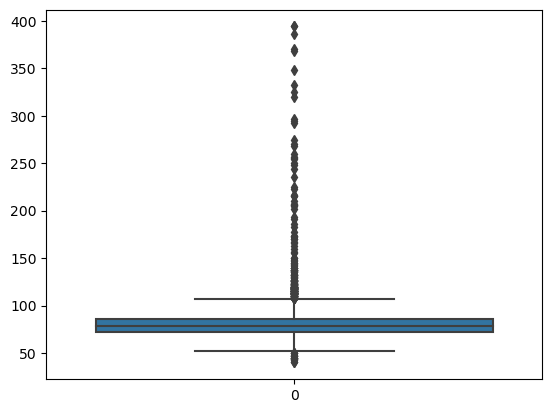

In [17]:
sns.boxplot(df['glucose'])

In [18]:
Q1 = df["glucose"].quantile(0.25)
Q3 = df["glucose"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q1,Q3)

14.0
72.0 86.0


In [19]:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)

In [20]:
A=df[(df["glucose"] < Lower_Fence) |(df["glucose"] > Upper_Fence)]
print(" The Number Of Outliers Is: "+ str(len(A)))

 The Number Of Outliers Is: 231


In [21]:
# Removing the outliers
Q1 = df['glucose'].quantile(0.25)
Q3 = df['glucose'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['glucose']>=upper)[0]
lower_array = np.where(df['glucose']<=lower)[0]

In [22]:
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

New Shape:  (3991, 15)


In [23]:
Q1 = df["glucose"].quantile(0.25)
Q3 = df["glucose"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q1,Q3)

13.0
72.0 85.0


In [24]:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)

In [25]:
A=df[(df["glucose"] < Lower_Fence) |(df["glucose"] > Upper_Fence)]
print(" The Number Of Outliers Is: "+ str(len(A)))

 The Number Of Outliers Is: 24


In [26]:
feature_cols=['Gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

In [27]:
X = df[feature_cols]
y = df.Heart_st

In [28]:
x_normalizer =StandardScaler()
x_norm = x_normalizer.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn import tree
from sklearn import metrics
# Create Decision Tree classifier object
clf = tree.DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 78.46410684474124 %


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
X = df[feature_cols] 
y = df.Heart_st
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42) 
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train) 
print(knn.score(X_test, y_test))

0.842685370741483


In [32]:
x= df[feature_cols] 
y = df.Heart_st
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(x_train, y_train)

C:\Users\Mohammed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[850   6]
 [139   3]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       856
         1.0       0.33      0.02      0.04       142

    accuracy                           0.85       998
   macro avg       0.60      0.51      0.48       998
weighted avg       0.78      0.85      0.80       998

Accuracy: 0.8547094188376754


In [36]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data and labels ready
# X represents the feature matrix, y represents the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_model = svm.SVC()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8560700876095119


In [37]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data and labels ready
# X represents the feature matrix, y represents the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into DMatrix format (optimized data structure for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the XGBoost model
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': 3
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = xgb_model.predict(dtest)

# Convert the predicted labels back to their original form if needed
# y_pred = [int(label) for label in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8548185231539425


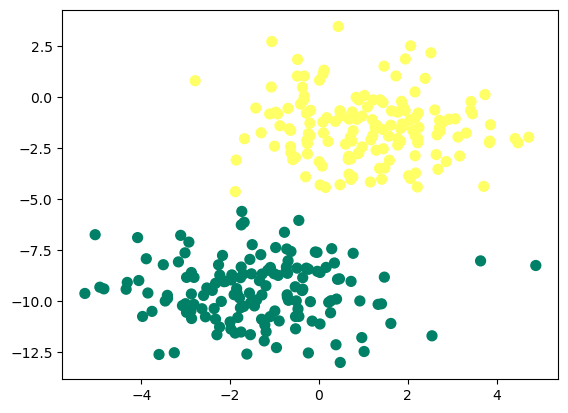

In [40]:
from sklearn.datasets import make_blobs
X, y = make_blobs(300, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer');

In [42]:
from sklearn.naive_bayes import GaussianNB
model_GBN = GaussianNB()
model_GBN.fit(X, y);

In [44]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model_GBN.predict(Xnew)

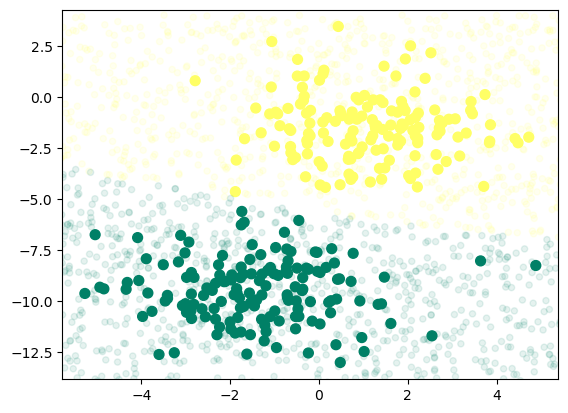

In [45]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='summer', alpha=0.1)
plt.axis(lim);

In [48]:
yprob = model_GBN.predict_proba(Xnew)
yprob[-10:].round(3)

array([[0.998, 0.002],
       [1.   , 0.   ],
       [0.987, 0.013],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.986, 0.014]])

In [38]:
x= df.iloc[:, [2,3]].values 
y= df.iloc[:, 4].values 

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 
#feature Scaling 
from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler() 
x_train= st_x.fit_transform(x_train) 
x_test= st_x.transform(x_test)

In [39]:
from sklearn.svm import SVC # "Support vector classifier" 
classifier = SVC(kernel='linear', random_state=0) 
classifier.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'